# Tarea - Ajuste de curvas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [7]:
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

In [19]:
import numpy as np
import sympy as sp

In [20]:
import pandas as pd
datos = pd.read_csv("Problema 1.csv")
datos

,No.,Año,Costo
0,0,2014,10.051101
1,1,2015,9.259127
2,2,2016,9.444813
3,3,2017,9.557723
4,4,2018,9.977324
5,5,2019,10.298326
6,6,2020,10.447217
7,7,2021,10.550506
8,8,2022,10.590784
9,9,2023,10.657418


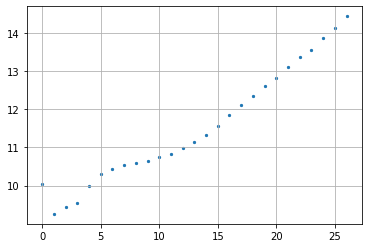

In [21]:
import matplotlib.pyplot as plt

x = datos["No."]
y = datos["Costo"]
plt.figure()
plt.scatter(x, y, s=5)
plt.grid()

In [24]:
import scipy.optimize as opt

def funcion_costo1(theta, x, y):
    prediccion = theta[0] + theta[1]*x
    error = y - prediccion
    error2 = error**2
    return np.sum(error2)

theta_inicial_1 = np.random.rand(2)
sol = opt.minimize(funcion_costo1, theta_inicial_1, args=(x,y))

costo1 = sol.fun
resultados1 = sol.x
sol

      fun: 2.370488951815328
 hess_inv: array([[ 0.07010582, -0.00396825],
       [-0.00396825,  0.00030525]])
      jac: array([-1.19209290e-07, -3.27825546e-07])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 5
     njev: 9
   status: 0
  success: True
        x: array([9.11567632, 0.18667056])

In [25]:
def funcion_costo2(theta, x, y):
    prediccion = theta[0] + theta[1]*x + theta[2]*x**2
    error = y - prediccion
    error2 = error**2
    return np.sum(error2)

theta_inicial_2 = np.random.rand(3)
sol = opt.minimize(funcion_costo2, theta_inicial_2, args=(x,y))

costo2 = sol.fun
resultados2 = sol.x
sol

      fun: 0.8443845193697458
 hess_inv: array([[ 1.44449889e-01, -2.17912233e-02,  6.85157744e-04],
       [-2.17912233e-02,  4.57977019e-03, -1.64352570e-04],
       [ 6.85157744e-04, -1.64352570e-04,  6.31976781e-06]])
      jac: array([1.51917338e-05, 3.13185155e-04, 6.64802641e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 156
      nit: 9
     njev: 36
   status: 2
  success: False
        x: array([9.59128637e+00, 7.25241385e-02, 4.39024816e-03])

In [26]:
def funcion_costo3(theta, x, y):
    prediccion = theta[0] + theta[1]*x + theta[2]*x**2 + theta[3]*x**3
    error = y - prediccion
    error2 = error**2
    return np.sum(error2)

theta_inicial_3 = np.random.rand(4)
sol = opt.minimize(funcion_costo3, theta_inicial_3, args=(x,y))

costo3 = sol.fun
resultados3 = sol.x
sol

      fun: 0.8404346758577307
 hess_inv: array([[ 2.27239525e-01, -6.41154210e-02,  4.83488355e-03,
        -1.06428255e-04],
       [-6.41154210e-02,  2.61882131e-02, -2.28212599e-03,
         5.43057026e-05],
       [ 4.83488355e-03, -2.28212599e-03,  2.13850635e-04,
        -5.32141317e-06],
       [-1.06428255e-04,  5.43057026e-05, -5.32141317e-06,
         1.36446493e-07]])
      jac: array([ 1.49011612e-08, -7.45058060e-09, -4.47034836e-08, -1.78813934e-07])
  message: 'Optimization terminated successfully.'
     nfev: 50
      nit: 5
     njev: 10
   status: 0
  success: True
        x: array([9.56752299e+00, 8.46495830e-02, 3.20207445e-03, 3.04659683e-05])

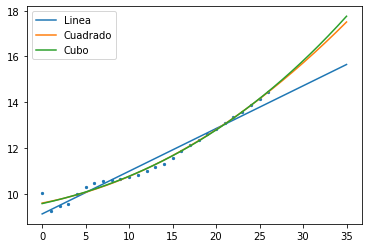

In [27]:
xn = np.linspace(0, 35, 200)
yn1 = resultados1[0] + resultados1[1]*xn
yn2 = resultados2[0] + resultados2[1]*xn + resultados2[2]*xn**2
yn3 = resultados3[0] + resultados3[1]*xn + resultados3[2]*xn**2 + resultados3[3]*xn**3

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x, y, s=5)
plt.plot(xn, yn1, label="Linea")
plt.plot(xn, yn2, label="Cuadrado")
plt.plot(xn, yn3, label="Cubo")
plt.legend(loc="best")

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

In [28]:
import numpy as np
import sympy as sp

data = pd.read_csv('population_data.csv')
data

,Year,Poblacion,Nacimientos,Decesos
0,1950,28296,1174947,418430
1,1951,29110,1183788,458238
2,1952,29980,1195209,408823
3,1953,30904,1261775,446127
4,1954,31880,1339837,378752
...,...,...,...,...
61,2011,115683,2586287,590693
62,2012,117054,2498880,602354
63,2013,118395,2478889,623599
64,2014,119713,2463420,633641


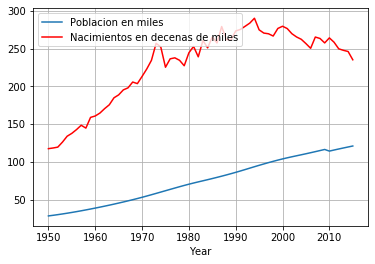

In [4]:
# Se muestra la gráfica. Vea como los datos son escalados, esto le ayudará en el cálculo
# de la regresión.

plt.plot(data.values[:,0],data.values[:,1]/1000,label=data.columns[1]+' en miles')
plt.plot(data.values[:,0],data.values[:,2]/10000,'r',label=data.columns[2]+' en decenas de miles')
plt.legend(loc=2)
plt.xlabel(data.columns[0])
plt.grid()

---

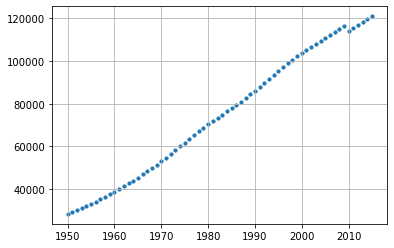

In [47]:
x = data["Year"]
y = data["Poblacion"]
plt.figure()
plt.scatter(x, y, s=10)
plt.grid()

In [48]:
import scipy.optimize as opt

x = data["Year"]
y = data["Poblacion"]

def funcion1(theta, x, y):
    prediccion = theta[0] + theta[1]*x
    error = y - prediccion
    error2 = error**2
    return np.sum(error2)

theta_i1 = np.random.rand(2)
sol = opt.minimize(funcion1, theta_i1, args=(x,y))

pob1 = sol.fun
resul1 = sol.x
sol

      fun: 212137170.43929267
 hess_inv: array([[ 2.01095628e+01, -1.01428335e-02],
       [-1.01428335e-02,  5.11772996e-06]])
      jac: array([-4.000e+00, -8.868e+03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 177
      nit: 11
     njev: 55
   status: 2
  success: False
        x: array([-2.98662172e+06,  1.54397924e+03])

In [49]:
def funcion2(theta, x, y):
    prediccion = theta[0] + theta[1]*x + theta[2]*x**2
    error = y - prediccion
    error2 = error**2
    return np.sum(error2)

theta_i2 = np.random.rand(3)
sol = opt.minimize(funcion2, theta_i2, args=(x,y))

pob2 = sol.fun
resul2 = sol.x
sol

      fun: 211292533.32012996
 hess_inv: array([[ 6.80781536e+05, -6.78017013e+02,  1.68846447e-01],
       [-6.78017016e+02,  6.75279955e-01, -1.68169021e-04],
       [ 1.68846448e-01, -1.68169021e-04,  4.18812183e-08]])
      jac: array([-1.70400000e+03, -3.36464200e+06, -6.63524454e+09])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 384
      nit: 14
     njev: 93
   status: 2
  success: False
        x: array([-4.88807853e+05, -9.76307649e+02,  6.35678538e-01])

In [50]:
def funcion3(theta, x, y):
    prediccion = theta[0] + theta[1]*x + theta[2]*x**2 + theta[3]*x**3
    error = y - prediccion
    error2 = error**2
    return np.sum(error2)

theta_i3 = np.random.rand(4)
sol = opt.minimize(funcion3, theta_i3, args=(x,y))

pob3 = sol.fun
resul3 = sol.x
sol

      fun: 2278622538.03367
 hess_inv: array([[ 1.59294590e-09,  7.38085218e-09,  5.02501617e-11,
        -2.72112498e-14],
       [ 7.38096153e-09,  3.28370423e-07,  5.58831549e-10,
        -3.65278927e-13],
       [ 5.02500557e-11,  5.58831540e-10,  3.86552279e-12,
        -2.09094635e-15],
       [-2.72112241e-14, -3.65278923e-13, -2.09094635e-15,
         1.14719188e-18]])
      jac: array([ 1.33440000e+04,  1.25802880e+07, -2.61831632e+09, -1.69658480e+11])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 312
      nit: 10
     njev: 60
   status: 2
  success: False
        x: array([ 6.87880388e+01, -7.13636007e+03,  6.62373651e+00, -1.51572335e-03])

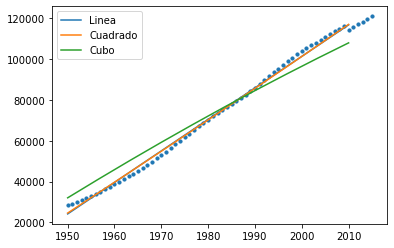

In [53]:
xn = np.linspace(1950, 2010, 10)
yn1 = resul1[0] + resul1[1]*xn
yn2 = resul2[0] + resul2[1]*xn + resul2[2]*xn**2
yn3 = resul3[0] + resul3[1]*xn + resul3[2]*xn**2 + resul3[3]*xn**3

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x, y, s=10)
plt.plot(xn, yn1, label="Linea")
plt.plot(xn, yn2, label="Cuadrado")
plt.plot(xn, yn3, label="Cubo")
plt.legend(loc="best")